#                Amazon Fine Food Reviews

## Exploratory Data Analysis


--Attribute Information--

1. Id - index
2. ProductId - id of the product
3. UserId - id of the user
4. ProfileName - name of the user
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator -  number of users who indicated whether they found the review helpful
7. Score - rating of the product 
8. Time - time of the review 
9. Summary - review summary
10. Text - detailed review


In [1]:
%matplotlib inline

import pandas as pd
import sqlite3
con = sqlite3.connect('amazon-fine-food-reviews/database.sqlite')

data = pd.read_sql_query("""SELECT * FROM Reviews""", con)
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data.shape

(568454, 10)

In [4]:
print "Number of different products: %d"%data.ProductId.nunique()
print "Number of different users: %d"%data.UserId.nunique()

Number of different products: 74258
Number of different users: 256059


In [7]:
l=data['Score'].value_counts().to_frame()
s=l.index.tolist()
count=l.Score.tolist()
length=len(data.index)
freq=map(lambda x: (x*100)/length,count)

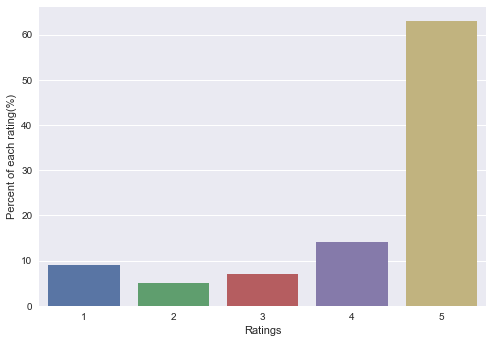

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
p=sns.barplot(x=s,y=freq)
p.set(xlabel="Ratings")
p.set(ylabel="Percent of each rating(%)")
plt.show()

**Inference**: Positive reviews are very common and almost 62% of the products have got a rating of 5. People are pretty generous when writing the reviews. Hence, we conclude that the dataset is imbalanced.

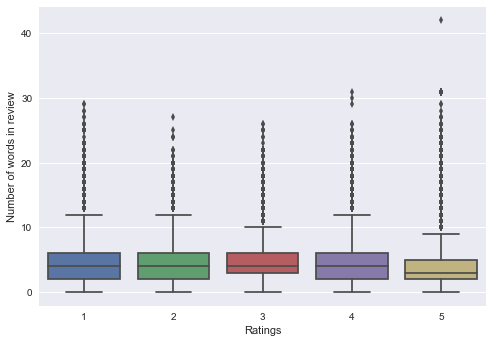

In [18]:
import numpy as np
x=data['Summary'].tolist()
cnt=[]
for s in x:
    try:
        s=str(s)
        w=s.split()
        cnt.append(len(w))
    except:
        cnt.append(0)
r=data['Score'].tolist()
d=pd.DataFrame({'Ratings':r,'NumWords':cnt})
p=sns.boxplot(x='Ratings',y='NumWords', data=d)
p.set(xlabel="Ratings")
p.set(ylabel="Number of words in review")
plt.show()

**Inference**: Positive reviews, typically 5 starred reviews have lesser number words as compared to negative and neutral reviews. 

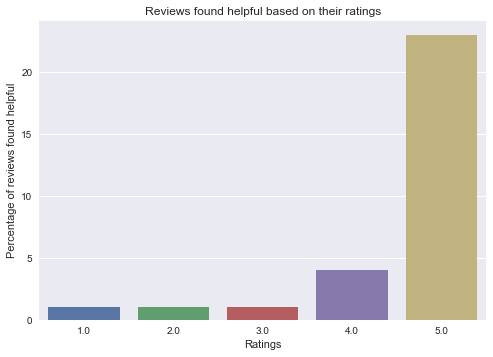

In [23]:
helpful_percent=[]
r=[]
for i in range(len(data.index)):
    try:
        p=(data.iloc[i]['HelpfulnessNumerator']/data.iloc[i]['HelpfulnessDenominator'])*100
        if p>=75:
            helpful_percent.append(p)
            r.append(data.iloc[i]['Score'])
        else:
            helpful_percent.append(np.nan)
            r.append(np.nan) 
    except ZeroDivisionError:
        pass
d=pd.DataFrame({'Helpfulness':helpful_percent,'Ratings':r})
d.dropna()
l=d['Ratings'].value_counts().to_frame()
r=l.index.tolist()
count=l.Ratings.tolist()
length=len(data.index)
freq=map(lambda x: (x*100)/length,count)
p=sns.barplot(x=r,y=freq)
p.set(xlabel="Ratings")
p.set(ylabel="Percentage of reviews found helpful")
p.set(title="Reviews found helpful based on their ratings")
plt.show()

**Inference**: Positive reviews were found more helpful than negative reviews however this maybe slightly due to the fact that the number of positive reviews in themselves are very high.

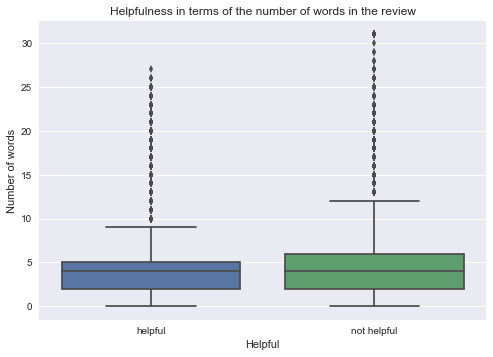

In [44]:
helpful=[]
for i in range(len(data.index)):
    if(data.iloc[i]['HelpfulnessDenominator']!=0):
        p=(data.iloc[i]['HelpfulnessNumerator']/data.iloc[i]['HelpfulnessDenominator'])*100
        if p>=75:
            helpful.append("helpful")
        elif p<=25:
            helpful.append("not helpful")
        else:
            helpful.append(np.nan) 
    else:
        helpful.append(np.nan) 
         
d=pd.DataFrame({"Number of words":cnt,"Helpful":helpful})
p=sns.boxplot(x="Helpful",y="Number of words",data=d)


p.set(ylabel="Number of words")
p.set(xlabel="Helpful")
p.set(title="Helpfulness in terms of the number of words in the review")

In [12]:
Frequent=[]
x=data.groupby(['UserId'])['UserId'].count()
x = x.sort_values(ascending=False)
y= pd.DataFrame({'UserId':x.index, 'count':x.values})
y=y.set_index('UserId')
for i in range(len(data)):
    z=data.iloc[i]['UserId']
    if y.loc[z]['count']>=50:
        Frequent.append('Frequent')
    else:
        Frequent.append('Not Frequent')
r=data['Score'].tolist()
f=pd.DataFrame({'Ratings':r,'Frequent':Frequent})


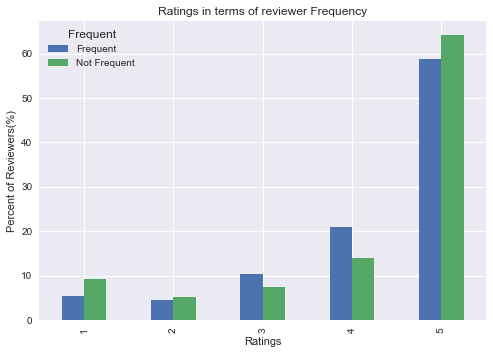

In [37]:
plt.figure()
xx=f.groupby(['Ratings','Frequent']).size()
bar= xx.unstack()
bar['Frequent']=map(lambda x: (x*100.0)/bar['Frequent'].sum(),bar['Frequent'])
bar['Not Frequent']=map(lambda x: (x*100.0)/bar['Not Frequent'].sum(),bar['Not Frequent'])
p=bar.plot(kind="bar")
p.set(ylabel="Percent of Reviewers(%)")
p.set(xlabel="Ratings")
p.set(title="Ratings in terms of reviewer Frequency")

**Inference**: Frequent reviewers are more discerning i.e. they rarely give extreme ratings of 1 and 5

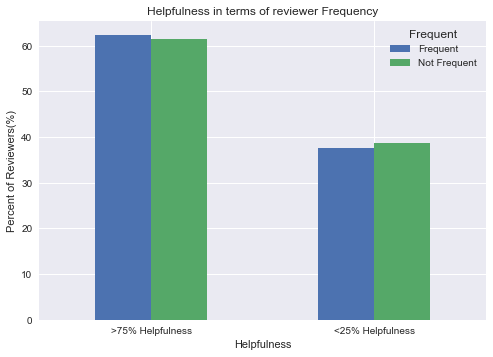

In [38]:
p5=pd.DataFrame({'Helpful':helpful,'Frequent':Frequent})
xx=p5.groupby(['Helpful','Frequent']).size()
bar= xx.unstack()
bar['Frequent']=map(lambda x: (x*100.0)/bar['Frequent'].sum(),bar['Frequent'])
bar['Not Frequent']=map(lambda x: (x*100.0)/bar['Not Frequent'].sum(),bar['Not Frequent'])
p=bar.plot(kind="bar")
p.set_xticklabels([">75% Helpfulness","<25% Helpfulness"],rotation=0)
p.set(ylabel="Percent of Reviewers(%)")
p.set(xlabel="Helpfulness")
p.set(title="Helpfulness in terms of reviewer Frequency")

**Inference**: Reviews by frequent reviewers are more helpful than those of infrequent reviewers 

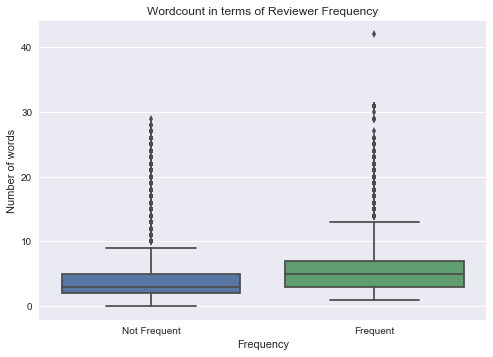

In [42]:
p=sns.boxplot(Frequent,cnt)
p.set(ylabel="Number of words")
p.set(xlabel="Frequency")
p.set(title="Wordcount in terms of Reviewer Frequency")

**Inference**: Frequent reviewers write more detailed reviews as compared to infrequent reviewers 


## Predicting if review is positive or negative based on the words in its summary and review using Naive-Bayes Classifier


* The ratings in the given data will help in the training of this supervised learning algorithm
* Due to unceratinty of being positive or negative the reviews with rating 3 are removed
* The data is sorted in descending order so that it can be easily divided into train and test datasets with the more latest data being in the test.

In [9]:
data=data[data.Score!=3.0]
data=data.sort_values(by='Time',ascending=False)
ProbPos=0.0
ProbNeg=0.0
rating=[]
sc=data['Score'].tolist()
for r in sc:
    if r>=4.0:
        rating.append(1)
        ProbPos+=1
    else:
        rating.append(0)
        ProbNeg+=1
countPos=ProbPos
countNeg=ProbNeg
ProbPos/=len(data.index)
ProbNeg/=len(data.index)
Final_data=pd.DataFrame({'Rating':rating})
print "Number of positive reviews: %d"%countPos
print "Number of negative reviews: %d"%countNeg
print "Probability of positive reviews: %f"%ProbPos
print "Probability of negative reviews: %f"%ProbNeg

Number of positive reviews: 443777
Number of negative reviews: 82037
Probability of positive reviews: 0.843981
Probability of negative reviews: 0.156019


**Data Preprocessing**
* combined unique words from summary and reviews for each row
* converted all words to lowercase
* removed special characters
* removed stopwords
* removed tags
* stemmed the words

In [10]:
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
stop_words = set(stopwords.words('english'))
ps=PorterStemmer()

wordset=[]
summary=data['Summary'].tolist()
review=data['Text'].tolist()

for i in range(len(data.index)): 
    wordbag=set()
    for x in [summary,review]:
        s=x[i].encode('utf-8')
        s=str(s.lower())
        soup = BeautifulSoup(s,"html.parser")
        s=soup.get_text()
        s=re.sub(r'[^A-Za-z]+',' ',s)
        s=' '.join(j for j in s.split() if j not in stop_words)
        words=word_tokenize(s)
        for w in words:
            wordbag.add(ps.stem(w))
    wordset.append(wordbag)
Final_data['WordSet']=wordset
print Final_data.head(2)

   Rating                                            WordSet
0       1  {madagascar, made, premium, describ, vanilla, ...
1       0  {enjoy, major, give, bacon, spectrum, mayonnai...


Split data into 70% training and 30% testing 

In [12]:
train=pd.DataFrame(columns=Final_data.columns)
test=pd.DataFrame(columns=Final_data.columns)

lt=len(Final_data.index)
x=int(0.70*lt)
train=Final_data[:x]
test=Final_data[x:]

print "Training Dataset: "
print "Length: %d"%len(train)
print train.head()
print "Test Datset: "
print "Length: %d"%len(test)
print test.head()

Training Dataset: 
Length: 368069
   Rating                                            WordSet
0       1  {madagascar, made, premium, describ, vanilla, ...
1       0  {enjoy, major, give, bacon, spectrum, mayonnai...
2       1  {love, help, one, instal, need, old, easi, lea...
3       1  {take, gone, gentl, love, liver, work, dog, ne...
4       1  {firm, even, instant, hous, tast, price, year,...
Test Datset: 
Length: 157745
        Rating                                            WordSet
368069       1  {waffl, great, longer, hous, treat, vanilla, f...
368070       0  {product, chocol, like, littl, one, nine, bar,...
368071       1  {smell, lower, buy, mouth, food, much, overal,...
368072       0  {star, good, wheat, give, heartland, particula...
368073       1  {enjoy, hide, look, best, ritter, free, also, ...


Calculating positive and negative probabilities for all words

In [7]:
Pw={}
for i in range(len(train)):
    for w in train.iloc[i]['WordSet']:
        if Pw.has_key(w)==False:
            Pw[w]={'P':0,'N':0}
        if train.iloc[i]['Rating']==1:
            Pw[w]['P']+=1
        else:
            Pw[w]['N']+=1
    

In [8]:
for w in Pw.keys():
    Pw[w]['P']=(Pw[w]['P']/countPos)
    Pw[w]['N']=(Pw[w]['N']/countNeg)


In [9]:
print Pw['good']

{'P': 0.22799288832003461, 'N': 0.18479466582151957}


Naive Bayes Classification:

In [124]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [20]:
predicted=[]    
for i in range(len(test)):
    probp=1.0
    probn=1.0
    for w in test.iloc[i]['WordSet']:
        if Pw.has_key(w)==False:     #Laplace Smoothing
            probp*=0.5
            probn*=0.5
        else:
            probp*=Pw[w]['P']
            probn*=Pw[w]['N']
    if probp>probn:
        predicted.append(1)
    else:
        predicted.append(0)
        
test['Predicted']=predicted
print test.head()


        Rating                                            WordSet  Predicted
368069       1  {waffl, great, longer, hous, treat, vanilla, f...          1
368070       0  {product, chocol, like, littl, one, nine, bar,...          0
368071       1  {smell, lower, buy, mouth, food, much, overal,...          1
368072       0  {star, good, wheat, give, heartland, particula...          1
368073       1  {enjoy, hide, look, best, ritter, free, also, ...          1


In [194]:
Log_loss=[]
AUC=[]
Prec=[]
Rec=[]
F1=[]
Acc=[]
Class=[]

## Function returning different metrics for checking the accuracy of a classifier:

In [195]:
from sklearn.metrics import log_loss
def metrics(actual,predicted,classifier):
    TP=0
    TN=0
    FP=0
    FN=0
   
    for i in range(len(actual)):
        if  actual[i]==1 and predicted[i]==1:
            TP+=1
        elif actual[i]==1 and predicted[i]==0:
            FN+=1
        elif actual[i]==0 and predicted[i]==1:
            FP+=1
        elif actual[i]==0 and predicted[i]==0:
            TN+=1

    print "True Positive: %d"%TP
    print "False Positive: %d"%FP
    print "True Negative: %d"%TN
    print "False Negative: %d"%FN

    TPR=TP/((TP+FN)*1.0)
    FPR=FP/((FP+TN)*1.0)
    Precision=TP/((TP+FP)*1.0)
    Recall=TPR
    Accuracy=TP/((TP+FN+FP+TN)*1.0)
    F1score=(2*Precision*Recall)/(Precision+Recall)
    logl=log_loss(actual,predicted)
    
    print
    print "True Positive Rate: %f"%TPR
    print "False Positive Rate: %f"%FPR
    print "Precision: %f"%Precision
    print "Recall: %f"%Recall
    print "F1 Score: %f"%F1score
    print "Accuracy: %f"%Accuracy
    print "Log-Loss: %f"%logl
    print
    
    Log_loss.append(logl)
    Prec.append(Precision)
    Rec.append(Recall)
    F1.append(F1score)
    Acc.append(Accuracy)
    Class.append(classifier)
    
    a=[[TP,FP],[FN,TN]]
    df_cm = pd.DataFrame(a, index = ['Positive','Negative'],
                  columns = ['Positive','Negative'])
    h=sns.heatmap(df_cm, annot=True)
    h.set(xlabel="True values",ylabel="Predicted")
    h.set_title("Confusion Matrix for "+classifier+" Classifier")
        

## Function for plotting the auc curve

In [187]:
from sklearn.metrics import auc,roc_curve
def plot_auc(actual,predicted):
    fpr, tpr, threshold = roc_curve(actual, predicted)
    roc_auc = auc(fpr, tpr)
    AUC.append(roc_auc)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### Checking accuracy of our implementation of Naive Bayes:

True Positive: 89005
False Positive: 2746
True Negative: 16686
False Negative: 49308

True Positive Rate: 0.643504
False Positive Rate: 0.141313
Precision: 0.970071
Recall: 0.643504
F1 Score: 0.773741
Accuracy: 0.564233
Log-Loss: 11.397405



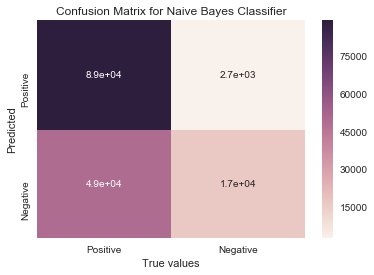

In [79]:
actual=test['Rating'].tolist()
predicted=test['Predicted'].tolist()
metrics(actual,predicted,"Naive Bayes")

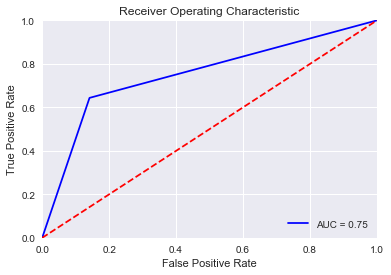

In [48]:
plot_auc(actual,predicted)

## Listing out the important features in Naive Bayes:

In [112]:
from operator import itemgetter
fimp={}
for k in Pw.keys():
    fimp[k]=abs(Pw[k]['P']-Pw[k]['N'])

sf=sorted(fimp.iteritems(),key=operator.itemgetter(1), reverse=True)

print "100 most important features:"
c=0
for k in sf:
    print k
    c+=1
    if c==100:
        break

100 most important features:
(u'great', 0.16040770929597564)
(u'love', 0.13258223994006457)
(u'disappoint', 0.09489148061746303)
(u'would', 0.0835152893730034)
(u'product', 0.0812425722377412)
(u'tast', 0.08109441192944844)
(u'best', 0.07581186214468083)
(u'like', 0.07488405719750132)
(u'bad', 0.07217345338331)
(u'buy', 0.060864135265691705)
(u'delici', 0.06082100481380616)
(u'even', 0.05757401135893961)
(u'money', 0.057155236706703444)
(u'review', 0.05644148846364224)
(u'thought', 0.05393860703634697)
(u'box', 0.0451824361339985)
(u'wast', 0.045062078613196936)
(u'favorit', 0.04505783866832763)
(u'br', 0.04471184367509806)
(u'bought', 0.04392705693567165)
(u'perfect', 0.043728154930588535)
(u'good', 0.04321624957067066)
(u'return', 0.042479057640732835)
(u'look', 0.04135274130946005)
(u'away', 0.0396282637685917)
(u'packag', 0.03893740285011553)
(u'receiv', 0.03874757492035934)
(u'purchas', 0.03837932507838407)
(u'horribl', 0.036839091133560396)
(u'excel', 0.03681519971993223)
(u'orde

# Using sklearn for classification

In [173]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

Preparing the data 

In [14]:
train['WordSet']=[' '.join(a) for a in train['WordSet']]
test['WordSet']=[' '.join(a) for a in test['WordSet']]

print train.head()
print test.head()

   Rating                                            WordSet
0       1  madagascar made premium describ vanilla excel ...
1       0  enjoy major give bacon spectrum mayonnais one ...
2       1  love help one instal need old easi leak fix cu...
3       1  take gone gentl love liver work dog new hand d...
4       1  firm even instant hous tast price year favorit...
        Rating                                            WordSet
368069       1  waffl great longer hous treat vanilla favorit ...
368070       0  product chocol like littl one nine bar white c...
368071       1  smell lower buy mouth food much overal excel d...
368072       0  star good wheat give heartland particular free...
368073       1  enjoy hide look best ritter free also treat fa...


Creating a bag of words representation:

In [15]:
cv=CountVectorizer()
tfidf_transformer = TfidfTransformer()
featurevec=cv.fit_transform(train['WordSet'])
train_tfidf=tfidf_transformer.fit_transform(featurevec)
targetvec=cv.transform(test['WordSet'])
test_tfidf=tfidf_transformer.transform(targetvec)

In [14]:
actual=test['Rating'].tolist()

## Bernoulli Naive Bayes

In [174]:
model = BernoulliNB().fit(train_tfidf,train['Rating'])
predictedNB= model.predict(test_tfidf)

True Positive: 131530
False Positive: 8241
True Negative: 11191
False Negative: 6783

True Positive Rate: 0.950959
False Positive Rate: 0.424094
Precision: 0.941039
Recall: 0.950959
F1 Score: 0.945973
Accuracy: 0.833814
Log-Loss: 3.289595



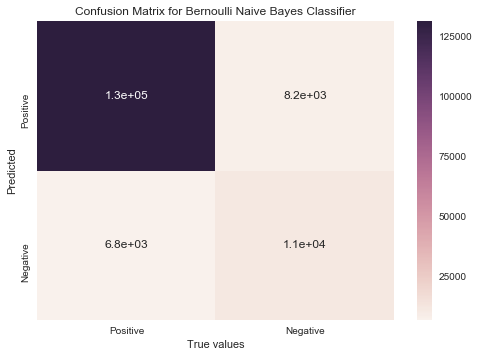

In [196]:
metrics(actual,predictedNB,"Bernoulli Naive Bayes")

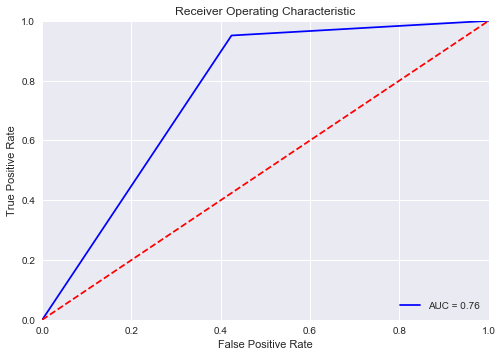

In [197]:
plot_auc(actual,predictedNB)

## Logistic Regression

### L2 Regularization:  

Checking the best hyperparameter for logistic regression with **L2** regularization using Grid Search with default 3 folds on the training data: 

In [179]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
grid1=clf.fit(train_tfidf,train['Rating'])
print grid1.best_score_
print grid1.best_params_

0.931825282759
{'C': 1}


Performing Logistic Regression with C=1 as found above.

In [180]:
model = LogisticRegression(C=1)
logl2=model.fit(train_tfidf,train['Rating'])
predictedl2=model.predict(test_tfidf)

True Positive: 135189
False Positive: 6222
True Negative: 13210
False Negative: 3124

True Positive Rate: 0.977414
False Positive Rate: 0.320193
Precision: 0.956001
Recall: 0.977414
F1 Score: 0.966588
Accuracy: 0.857010
Log-Loss: 2.046368



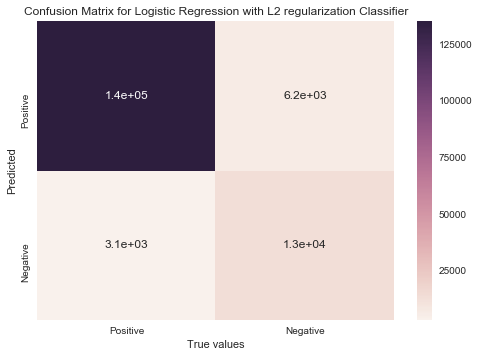

In [198]:
metrics(actual,predictedl2,"Logistic Regression with L2 regularization")

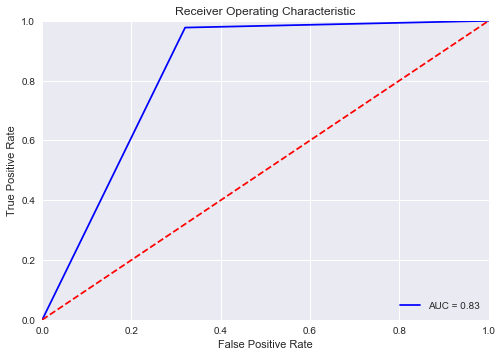

In [199]:
plot_auc(actual,predictedl2)

### L1 Regularization:  

Checking the best hyperparameter for logistic regression with **L1** regularization using Grid Search with default 3 folds on the training data: 

In [13]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l1'), param_grid)
grid2=clf.fit(train_tfidf,train['Rating'])
print grid2.best_score_
print grid2.best_params_

0.931616082854
{'C': 1}


In [162]:
model = LogisticRegression(C=1,penalty='l1')
logl1=model.fit(train_tfidf,train['Rating'])
predictedl1=model.predict(test_tfidf)

True Positive: 134905
False Positive: 5923
True Negative: 13509
False Negative: 3408

True Positive Rate: 0.975360
False Positive Rate: 0.304807
Precision: 0.957942
Recall: 0.975360
F1 Score: 0.966572
Accuracy: 0.855209
Log-Loss: 2.043083



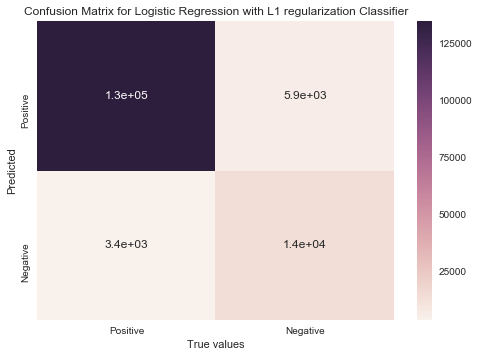

In [200]:
metrics(actual,predictedl1,"Logistic Regression with L1 regularization")

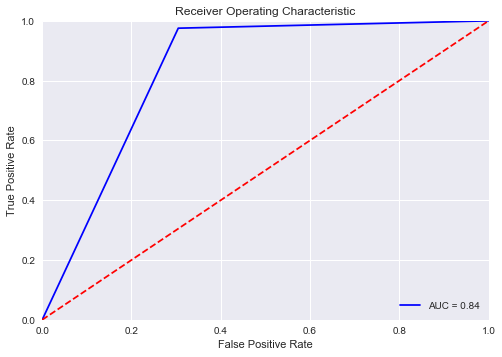

In [201]:
plot_auc(actual,predictedl1)

Getting the 100 most important features found by Logitic Regression

In [62]:
w=model.coef_
w=w[0]

In [66]:
from operator import itemgetter
weights={}
for i in range(len(w)):
    weights[i]=w[i]

sfi=sorted(weights.iteritems(),key=itemgetter(1), reverse=True)
sfi=sfi[:500]
print "Indices of 100 most important features and their corresponding weights:"
c=0
for k in sfi:
    print k
    c+=1
    if c==100:
        break

Indices of 100 most important features and their corresponding weights:
(28837, 18.56163570743486)
(17549, 15.436246357858442)
(6420, 14.706022777275628)
(39067, 13.714699553734633)
(22656, 13.677664665484654)
(49690, 12.545142439935251)
(50850, 12.141061684293895)
(75906, 12.059895492453082)
(4623, 11.237378672914804)
(75935, 10.438092684004328)
(28200, 10.401578042976)
(2920, 9.8125491342550557)
(2097, 9.5845518685473845)
(31716, 9.17966606697183)
(31205, 9.1612302232647362)
(654, 8.7591722853825509)
(19748, 8.679960058455956)
(44927, 8.6297793103658567)
(23462, 8.6040340048236921)
(66397, 8.5148654323966699)
(60429, 8.1229970055239242)
(74839, 8.0345511472847733)
(23702, 7.716153802587578)
(5759, 7.7095246068650631)
(7722, 7.6373440622639253)
(17636, 7.5425578358128931)
(74699, 7.4695229311623272)
(12174, 7.3821920207967002)
(69436, 7.3584259183341976)
(45245, 7.3471113701340682)
(20506, 7.2009387199426564)
(35100, 7.1892402099825841)
(60958, 7.0949839738734193)
(14098, 6.9819129045

Taking a subset of only the 500 most important features from the train and test datasets so as to perform SVC later   

In [ ]:
from scipy import sparse

indices=[x[0] for x in sfi]
reduced_train=train_tfidf[:,indices]
reduced_test=test_tfidf[:,indices]

## No regularization

Checking the best hyperparameter for logistic regression with **no** regularization using Grid Search with default 3 folds on the training data (by making c very large so that lambda becomes close to 0, thus nullifying the regularization term): 

In [203]:
model = LogisticRegression(C=10000)
logno=model.fit(train_tfidf,train['Rating'])
predictedno=model.predict(test_tfidf)

True Positive: 132017
False Positive: 6484
True Negative: 12948
False Negative: 6296

True Positive Rate: 0.954480
False Positive Rate: 0.333676
Precision: 0.953184
Recall: 0.954480
F1 Score: 0.953832
Accuracy: 0.836901
Log-Loss: 2.798255



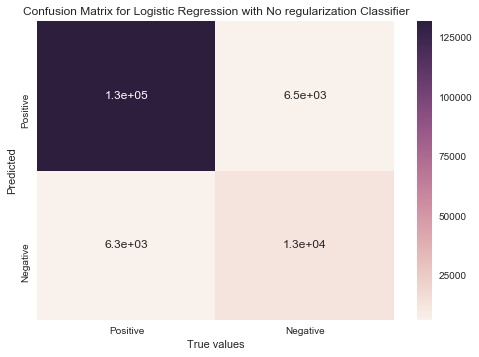

In [204]:
metrics(actual,predictedno,"Logistic Regression with No regularization")

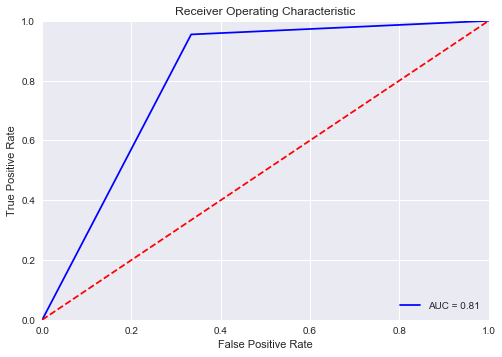

In [205]:
plot_auc(actual,predictedno)

## SVC

In [225]:
#(Doing it just for the sake of doing it :/)

Since the time complexity of SVC is huge, some changes had to be made to make it feasible to apply: 
1. 10% of data was taken out of the training set for 3 fold cross validation
2. Only the 500 most important features found by logistic regression were taken to perform SVC 

In [152]:
lt1=train_tfidf.shape[0]
a=int(0.9*lt1)
x1=range(a,lt1)
validation=reduced_train[x1,:]
val_rating=train['Rating'].tolist()
val_rating=val_rating[a:lt1]

train_redrating=train['Rating'].tolist()

In [110]:
from sklearn import svm
parameters = {'C': [0.01, 0.1, 1, 10, 100]}
svr = svm.SVC(kernel='linear')
clf = GridSearchCV(svr, parameters,verbose=1,n_jobs=-1)
grid3=clf.fit(validation,val_rating)
print grid3.best_score_
print grid3.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.8min finished


0.863314043524
{'C': 10}


In [153]:
clf=svm.SVC(kernel='linear',C=10)
clf.fit(reduced_train,train_redrating)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [154]:
predicted_linearsvc=clf.predict(reduced_test)

True Positive: 132736
False Positive: 10379
True Negative: 9053
False Negative: 5577

True Positive Rate: 0.959678
False Positive Rate: 0.534119
Precision: 0.927478
Recall: 0.959678
F1 Score: 0.943303
Accuracy: 0.841459
Log-Loss: 3.493670



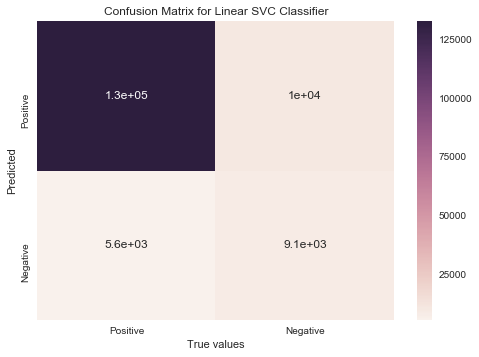

In [206]:
metrics(actual,predicted_linearsvc,"Linear SVC")

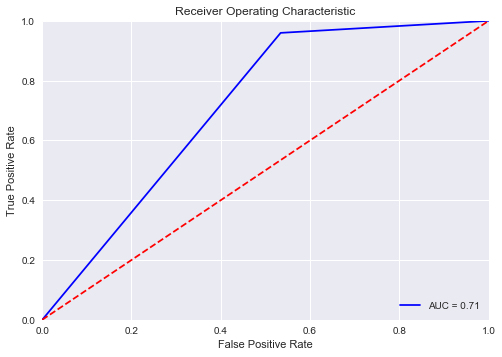

In [208]:
plot_auc(actual,predicted_linearsvc)

In [112]:
parameters = {'C': [0.01, 0.1, 1, 10, 100],'gamma':[0.01, 0.1, 1,10,100]}
svr = svm.SVC(kernel='rbf')
clf = GridSearchCV(svr, parameters,verbose=2,n_jobs=-1)
grid4=clf.fit(validation,val_rating)
print grid4.best_score_
print grid4.best_params_

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 40.9min finished


0.871763523243
{'C': 1, 'gamma': 1}


In [158]:
clf=svm.SVC(kernel='rbf',C=1,gamma=1)
clf.fit(reduced_train,train_redrating)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [159]:
predicted_kernelsvc=clf.predict(reduced_test)

True Positive: 133325
False Positive: 10573
True Negative: 8859
False Negative: 4988

True Positive Rate: 0.963937
False Positive Rate: 0.544103
Precision: 0.926524
Recall: 0.963937
F1 Score: 0.944860
Accuracy: 0.845193
Log-Loss: 3.407185



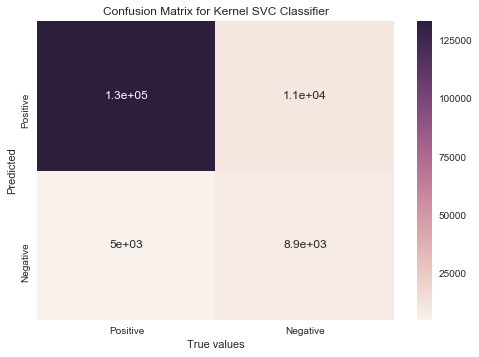

In [209]:
metrics(actual,predicted_kernelsvc,"Kernel SVC")

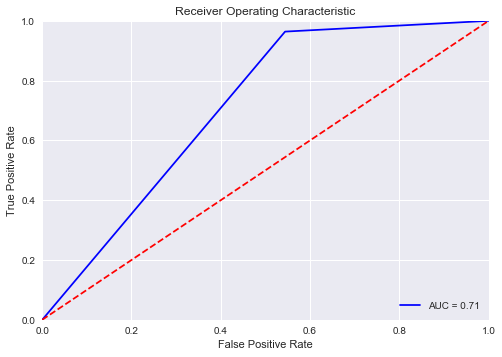

In [210]:
plot_auc(actual,predicted_kernelsvc)

## Comparison Between the different classifiers:

In [226]:
from IPython.display import display
compare=pd.DataFrame({'Classifier':Class,'Precision':Prec,'Recall':Rec,'F1 Score':F1,'Accuracy':Acc,'Log-Loss':Log_loss,'AUC':AUC})
compare=compare.set_index('Classifier')
display(compare)

,AUC,Accuracy,F1 Score,Log-Loss,Precision,Recall
Classifier,,,,,,
Bernoulli Naive Bayes,0.763432,0.833814,0.945973,3.289595,0.941039,0.950959
Logistic Regression with L2 regularization,0.828610,0.857010,0.966588,2.046368,0.956001,0.977414
Logistic Regression with L1 regularization,0.835277,0.855209,0.966572,2.043083,0.957942,0.975360
Logistic Regression with No regularization,0.810402,0.836901,0.953832,2.798255,0.953184,0.954480
Linear SVC,0.712780,0.841459,0.943303,3.493670,0.927478,0.959678
Kernel SVC,0.709917,0.845193,0.944860,3.407185,0.926524,0.963937


In [219]:
d=pd.concat([train,test])
mask = d['Rating']==1
posframe = d[mask]
negframe = d[~mask]

## Common Words in Positive Reviews

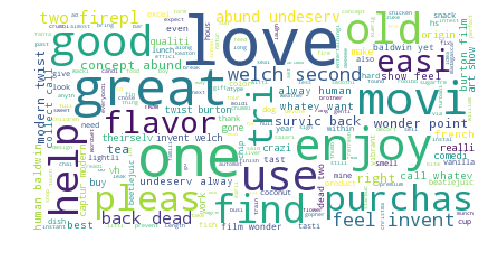

In [221]:
from wordcloud import WordCloud

wordcloud = WordCloud(    background_color='white',
                          max_words=200,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str(posframe['WordSet']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
fig.savefig("wordpos.png", dpi=900)

## Common Words in Negative Reviews

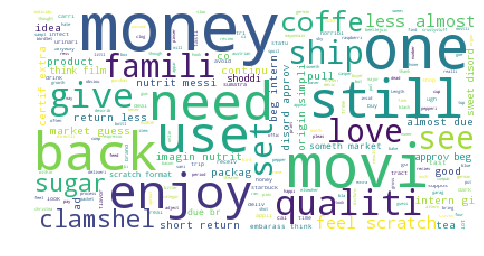

In [224]:
wordcloud = WordCloud(    background_color='white',
                          max_words=200,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str(negframe['WordSet']))

print(wordcloud)
fig = plt.figure(2)
plt.imshow(wordcloud)
plt.axis('off')
fig.savefig("wordneg.png", dpi=900)